In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dfE = pd.read_csv("/content/drive/My Drive/Colab Notebooks/df1E.csv")
dfE

,Unnamed: 0,collision_no,acc_date,year,month_name,day_name,acctime,longitude,latitude,X,Y,road_class,road_surface_cond,visibility,light,involved_class,involved_injury_class,# involved,# injured,# fatalities,# KSI
0,0,1,2000-09-11,2000,September,Monday,850,-79.456317,43.727732,-8.845037e+06,5.423404e+06,Minor Arterial,DRY,CLEAR,DAYLIGHT,"DRIVER, DRIVER","NONE, NONE",2,0,0,0
1,1,2,2000-09-11,2000,September,Monday,850,-79.456271,43.727698,-8.845032e+06,5.423399e+06,Minor Arterial,DRY,CLEAR,DAYLIGHT,"PASSENGER, PASSENGER, VEHICLE OWNER, VEHICLE O...","MINIMAL, MINIMAL, NONE, NONE",4,2,0,0
2,2,3,2000-01-02,2000,January,Sunday,630,-79.398357,43.706721,-8.838585e+06,5.420168e+06,Major Arterial,WET,RAIN,DARK,"DRIVER, VEHICLE OWNER, DRIVER","NONE, NONE, NONE",3,0,0,0
3,3,4,2000-01-02,2000,January,Sunday,1100,-79.395091,43.691344,-8.838221e+06,5.417801e+06,Major Arterial,WET,RAIN,DAYLIGHT,"DRIVER, DRIVER","NONE, NONE",2,0,0,0
4,4,5,2000-01-02,2000,January,Sunday,1125,-79.370090,43.656146,-8.835438e+06,5.412383e+06,Minor Arterial,WET,RAIN,DAYLIGHT,"VEHICLE OWNER, DRIVER, VEHICLE OWNER, DRIVER","NONE, NONE, NONE, NONE",4,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990856,990856,1038394,2019-02-24,2019,February,Sunday,1845,-79.319599,43.768005,-8.829817e+06,5.429610e+06,Major Arterial,LOOSE SNOW,SNOW,"DARK, ARTIFICIAL","DRIVER, PASSENGER, DRIVER, PASSENGER, PASSENGER","NONE, NONE, NONE, NONE, MINIMAL",5,1,0,0
990857,990857,1038395,2019-10-20,2019,October,Sunday,1437,-79.587139,43.668288,-8.859600e+06,5.414252e+06,Local,DRY,CLEAR,DAYLIGHT,"DRIVER, DRIVER","NONE, NONE",2,0,0,0
990858,990858,1038396,2019-05-10,2019,May,Friday,2200,-79.351940,43.677554,-8.833418e+06,5.415678e+06,Major Arterial,DRY,CLEAR,"DARK, ARTIFICIAL","DRIVER, DRIVER, DRIVER, PASSENGER","MAJOR, NONE, NONE, MINOR",4,2,0,1
990859,990859,1038397,2019-07-20,2019,July,Saturday,2236,-79.314602,43.678378,-8.829261e+06,5.415805e+06,Minor Arterial,WET,RAIN,"DARK, ARTIFICIAL",DRIVER,NONE,1,0,0,0


In [0]:
# Determine the number of accidents for each day of the week by month (combine years 2000-2018) NOT 2019!

def RTAs_by_month(df, month):
    month_list = []
    mon, tues, wed, thurs, fri, sat, sun = 0,0,0,0,0,0,0
    
    for idx, row in df.iterrows():
        if row["month_name"] == month and row["day_name"] == "Monday": mon +=1
        elif row["month_name"] == month and row["day_name"] == "Tuesday": tues +=1
        elif row["month_name"] == month and row["day_name"] == "Wednesday": wed +=1
        elif row["month_name"] == month and row["day_name"] == "Thursday": thurs +=1
        elif row["month_name"] == month and row["day_name"] == "Friday": fri +=1
        elif row["month_name"] == month and row["day_name"] == "Saturday": sat +=1
        elif row["month_name"] == month and row["day_name"] == "Sunday": sun +=1
        else: a=0 

    month_list.append(mon)
    month_list.append(tues)
    month_list.append(wed)
    month_list.append(thurs)
    month_list.append(fri)
    month_list.append(sat)
    month_list.append(sun)
    
    total = mon+tues+wed+thurs+fri+sat+sun
    
    return(month_list)

In [0]:
#Extract RTA data for each day by month

df = dfE[dfE['year']!=2019] # all years except 2019

january = RTAs_by_month(df, "January")
february = RTAs_by_month(df, "February")
march = RTAs_by_month(df, "March")
april = RTAs_by_month(df, "April")
may = RTAs_by_month(df, "May")
june = RTAs_by_month(df, "June")
july = RTAs_by_month(df, "July")
august = RTAs_by_month(df, "August")
september = RTAs_by_month(df, "September")
october = RTAs_by_month(df, "October")
november = RTAs_by_month(df, "November")
december = RTAs_by_month(df, "December")

In [6]:
# Create matrix for the heatmap
columns = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
rows = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
data = np.array([january, february, march, april, may, june, july, august, september, october, november, december])
heatmap_dfE = pd.DataFrame(data=data, index=rows, columns=columns)
heatmap_dfE  # all years except 2019

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
January,12879,12972,13012,13176,14508,10774,7712
February,10797,11206,12328,12486,12943,10502,7542
March,10251,10357,11229,11459,11907,9544,7023
April,9745,10716,10449,11298,10950,9770,7270
May,10231,12683,12220,12707,13093,10119,7886
June,11418,11987,12529,12990,14022,9988,8267
July,10946,12221,11845,11990,12548,9583,7908
August,9575,11925,12047,12211,13210,9546,7272
September,10624,12667,12350,12510,13907,11027,8057
October,10622,13614,13468,13093,14655,11188,8413


In [0]:
heatmap_dfE.to_csv('heatmap_dfE.csv')

In [8]:
sum(heatmap_dfE.sum())

954808

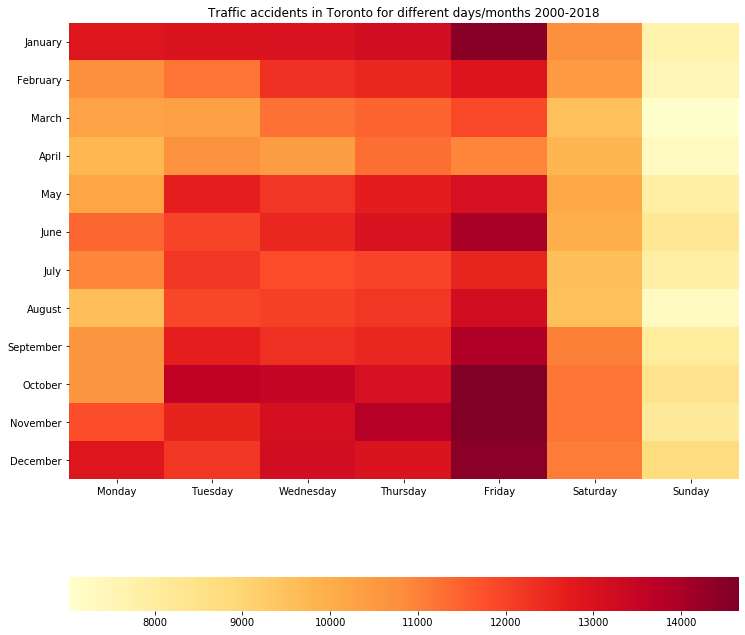

In [9]:
fig = plt.figure(figsize=(12,12))
map1 = sns.heatmap(heatmap_dfE, annot=False, fmt="d", cmap='YlOrRd', cbar_kws={"orientation": "horizontal"} ) # cmap = 'BuPu', 'coolwarm', 'YlOrRd'
map1.set_title("Traffic accidents in Toronto for different days/months 2000-2018") # all years except 2019
map1.figure.savefig("heatmap_dfE.png")

In [10]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Heatmap(
                   z=heatmap_dfE,
                   x=columns,
                   y=rows,
                   hoverongaps = False))
fig.show()

In [0]:
hour = []
for i in range(len(dfE)):
    if len(str(dfE.loc[i, 'acctime']))==2:
        hour.append(int(0))
    elif len(str(dfE.loc[i, 'acctime']))==3:
        hour.append(int(str(dfE.loc[i, 'acctime'])[:1]))
    elif len(str(dfE.loc[i, 'acctime']))==4:
        hour.append(int(str(dfE.loc[i, 'acctime'])[:2]))
    else:
        hour.append(np.nan)

In [0]:
dfE['hour'] = hour

In [13]:
print('{:,}'.format(dfE['hour'].isna().sum()), 
      'data points in "hour" are nan, which will be removed.')
dfE.dropna(subset=['hour'], inplace=True)

dfE.head()

5,248 data points in "hour" are nan, which will be removed.


,Unnamed: 0,collision_no,acc_date,year,month_name,day_name,acctime,longitude,latitude,X,Y,road_class,road_surface_cond,visibility,light,involved_class,involved_injury_class,# involved,# injured,# fatalities,# KSI,hour
0,0,1,2000-09-11,2000,September,Monday,850,-79.456317,43.727732,-8.845037e+06,5.423404e+06,Minor Arterial,DRY,CLEAR,DAYLIGHT,"DRIVER, DRIVER","NONE, NONE",2,0,0,0,8.0
1,1,2,2000-09-11,2000,September,Monday,850,-79.456271,43.727698,-8.845032e+06,5.423399e+06,Minor Arterial,DRY,CLEAR,DAYLIGHT,"PASSENGER, PASSENGER, VEHICLE OWNER, VEHICLE O...","MINIMAL, MINIMAL, NONE, NONE",4,2,0,0,8.0
2,2,3,2000-01-02,2000,January,Sunday,630,-79.398357,43.706721,-8.838585e+06,5.420168e+06,Major Arterial,WET,RAIN,DARK,"DRIVER, VEHICLE OWNER, DRIVER","NONE, NONE, NONE",3,0,0,0,6.0
3,3,4,2000-01-02,2000,January,Sunday,1100,-79.395091,43.691344,-8.838221e+06,5.417801e+06,Major Arterial,WET,RAIN,DAYLIGHT,"DRIVER, DRIVER","NONE, NONE",2,0,0,0,11.0
4,4,5,2000-01-02,2000,January,Sunday,1125,-79.370090,43.656146,-8.835438e+06,5.412383e+06,Minor Arterial,WET,RAIN,DAYLIGHT,"VEHICLE OWNER, DRIVER, VEHICLE OWNER, DRIVER","NONE, NONE, NONE, NONE",4,0,0,0,11.0


In [14]:
dfE['hour'].unique()

array([ 8.,  6., 11., 17., 13., 14., 16., 19.,  2., 18., 20., 22., 15.,
       21.,  1.,  7.,  9., 12., 23., 10.,  0.,  3.,  4.,  5.])

In [0]:
# Function to determine number of accidents for each day of the week by hour (combine years 2000-2018) NOT 2019!

def RTAs_by_hour(df, hour):
    hour_list = []
    mon, tues, wed, thurs, fri, sat, sun = 0,0,0,0,0,0,0
    
    for idx, row in df.iterrows():
        if row["hour"] == hour and row["day_name"] == "Monday": mon +=1
        elif row["hour"] == hour and row["day_name"] == "Tuesday": tues +=1
        elif row["hour"] == hour and row["day_name"] == "Wednesday": wed +=1
        elif row["hour"] == hour and row["day_name"] == "Thursday": thurs +=1
        elif row["hour"] == hour and row["day_name"] == "Friday": fri +=1
        elif row["hour"] == hour and row["day_name"] == "Saturday": sat +=1
        elif row["hour"] == hour and row["day_name"] == "Sunday": sun +=1
        else: a=0 

    hour_list.append(mon)
    hour_list.append(tues)
    hour_list.append(wed)
    hour_list.append(thurs)
    hour_list.append(fri)
    hour_list.append(sat)
    hour_list.append(sun)
    
    total = mon+tues+wed+thurs+fri+sat+sun
    
    return(hour_list)

In [0]:
df = dfE[dfE['year']!=2019] # all years except 2019

hour_0 = RTAs_by_hour(df, 0)
hour_1 = RTAs_by_hour(df, 1)
hour_2 = RTAs_by_hour(df, 2)
hour_3 = RTAs_by_hour(df, 3)
hour_4 = RTAs_by_hour(df, 4)
hour_5 = RTAs_by_hour(df, 5)
hour_6 = RTAs_by_hour(df, 6)
hour_7 = RTAs_by_hour(df, 7)
hour_8 = RTAs_by_hour(df, 8)
hour_9 = RTAs_by_hour(df, 9)
hour_10 = RTAs_by_hour(df, 10)
hour_11 = RTAs_by_hour(df, 11)
hour_12 = RTAs_by_hour(df, 12)
hour_13 = RTAs_by_hour(df, 13)
hour_14 = RTAs_by_hour(df, 14)
hour_15 = RTAs_by_hour(df, 15)
hour_16 = RTAs_by_hour(df, 16)
hour_17 = RTAs_by_hour(df, 17)
hour_18 = RTAs_by_hour(df, 18)
hour_19 = RTAs_by_hour(df, 19)
hour_20 = RTAs_by_hour(df, 20)
hour_21 = RTAs_by_hour(df, 21)
hour_22 = RTAs_by_hour(df, 22)
hour_23 = RTAs_by_hour(df, 23)

In [0]:
# Create matrix for the heatmap
columns = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
rows = ["0", "1am", "2am", "3am", "4am", "5am", "6am", "7am", "8am", "9am", "10am", "11am", "12pm", "1pm", "2pm", "3pm","4pm","5pm","6pm","7pm","8pm","9pm","10pm","11pm"]
data = np.array([hour_0, hour_1, hour_2, hour_3, hour_4, hour_5, hour_6, hour_7, hour_8, hour_9, hour_10, hour_11, hour_12, hour_13, hour_14, hour_15, hour_16, hour_17, hour_18, hour_19, hour_20, hour_21, hour_22, hour_23])
heatmap_hour = pd.DataFrame(data=data, index=rows, columns=columns)

In [0]:
heatmap_hour.to_csv('heatmap_hour.csv')

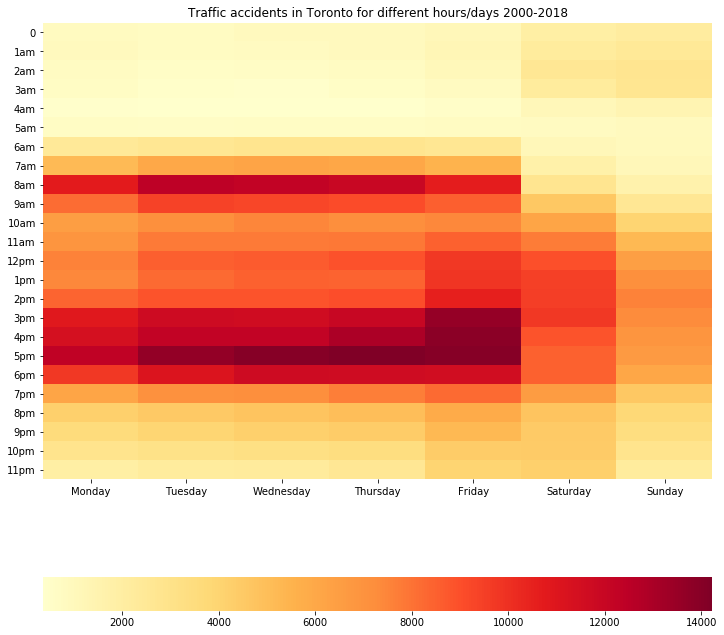

In [19]:
fig = plt.figure(figsize=(12,12))
ax = sns.heatmap(heatmap_hour, annot=False, fmt="d", cmap='YlOrRd', cbar_kws={"orientation": "horizontal"})  # cmap = 'BuPu', 'coolwarm', 'YlOrRd'
ax.set_title("Traffic accidents in Toronto for different hours/days 2000-2018") # all years except 2019
ax.figure.savefig("heatmap_dfE_2.png")